In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3__quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'
data = pd.read_csv(folder+fnameGC3+'.csv')
data

,Range Min,Range Max,Lower Quartile,Median,Upper Quartile,Mean,Std,Min,Max
0,-0.0290,-2.610000e-02,3614.0,3740.0,4114.0,3962.92,645.680,3051.5,6041.0
1,-0.0261,-2.320000e-02,3371.5,3604.0,4035.5,3879.38,875.729,2981.0,7287.5
2,-0.0232,-2.030000e-02,3388.0,3566.0,4000.0,3942.01,1010.750,2957.5,8462.5
3,-0.0203,-1.740000e-02,3339.5,3543.5,4317.5,3976.15,1128.560,2858.0,11280.0
4,-0.0174,-1.450000e-02,3219.5,3693.5,3968.5,3771.32,778.182,2884.5,7540.5
5,-0.0145,-1.160000e-02,3060.0,3358.5,3841.0,3652.24,962.722,2774.5,8707.0
6,-0.0116,-8.700000e-03,3150.0,3333.0,3806.0,3561.74,679.759,2749.5,6608.0
7,-0.0087,-5.800000e-03,3161.0,3537.0,3937.5,3686.08,763.897,2601.5,7963.0
8,-0.0058,-2.900000e-03,3036.5,3201.0,3765.0,3463.17,733.198,3.0,7059.5
9,-0.0029,-3.469450e-18,3065.0,3229.5,3763.5,3584.30,977.421,2611.0,9304.5


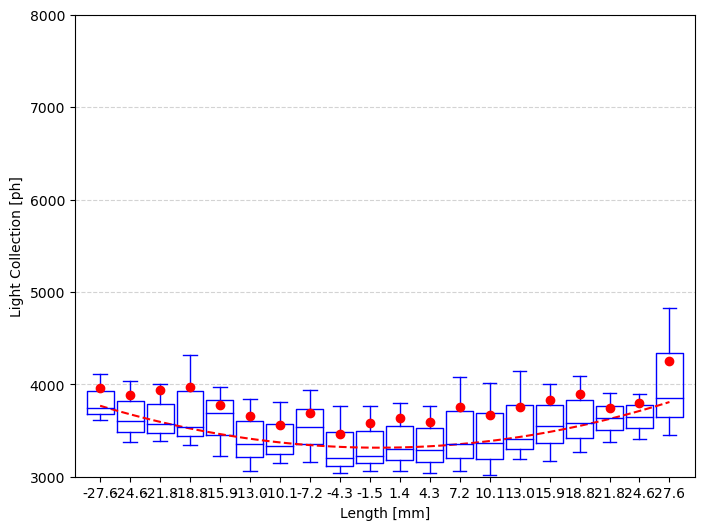

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Read the CSV file into a DataFrame
fnameGC3='EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

folder='CSV/'
data = pd.read_csv(folder+fnameGC3+'.csv')

# Calculate the box positions
data['Position'] = (data['Range Max'] + data['Range Min']) / 2*1000
# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))
# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for each row
box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
            for i in range(len(data))]
box_positions = data['Position'].tolist()
box_width = (29 * 2)*0.9 / len(data)  # Set the box width dynamically

boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width, 
patch_artist=False,  # Set patch_artist to False
                     whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                     medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))

# Set the x-axis limits
ax.set_xlim(-30, 30)


# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Box Plot')

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(box_positions), max(box_positions), 100)
y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')

# Add a parabolic fit to the mean values
#x_fit_mean = np.linspace(min(box_positions), max(box_positions), 100)
#y_fit_mean = np.polyval(np.polyfit(box_positions, data['Mean'], 2), x_fit_mean)
#ax.plot(x_fit_mean, y_fit_mean, color='green', linestyle='--')

# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))


    # Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')


# Calculate the mean of the boxes
mean_values = data['Mean'].to_list()

# Add the 'Mean' data to the plot
ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')
    
# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

# Remove the title
ax.set_title('')

# Show the plot
plt.show()

plt.savefig('CSV/GC3_End.pdf',format='pdf')


In [ ]:
plt.savefig(folder +fname+'.pdf')


In [ ]:
box_data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3__quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

folder = 'CSV/'
data = pd.read_csv(folder + fnameGC3 + '.csv')

# Calculate the box positions
data['Position'] = (data['Range Max'] + data['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set the y-axis limits
#ax.set_ylim(3000, 5000)

# Create boxplots for each row
box_data = [data.loc[i, ['Min','Lower Quartile', 'Median', 'Upper Quartile','Max']].values.tolist()
#box_data = [[3051.5, 3614.0, 3740.0, 4114.0, 6041.0]
            for i in range(len(data))]
print(box_data)
box_positions = data['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data)# Increase the range of the whiskers to include outliers
whis_value = 10.0  # Set the box width dynamically

boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width,
                     patch_artist=False,
                     whiskerprops=dict(color='blue'),
                     capprops=dict(color='blue'),
                     medianprops=dict(color='blue'),
                     flierprops=dict(marker='o', markersize=5, markerfacecolor='black', markeredgecolor='black'),
                    whis=whis_value)


# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Box Plot')

# Add a parabolic fit to the mean values
x_fit = np.linspace(min(box_positions), max(box_positions), 100)
y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
ax.plot(x_fit, y_fit, color='red', linestyle='--')

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Calculate the mean of the boxes
mean_values = data['Mean'].to_list()

# Add the 'Mean' data to the plot
ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')

# Customize the color of all boxes
for box in boxplot['boxes']:
    box.set_color('blue')

# Remove the title
ax.set_title('')
# Round the x-axis tick labels to the first decimal place
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
# Save the figure as a PDF
output_filename = 'CSV/GC3.pdf'
plt.savefig(output_filename, format='pdf')

# Show the plot
plt.show()


In [ ]:
def plot_boxplot(folder,file_path,fig,ax,colorbox,colorfit):

    data = pd.read_csv(folder+fname+'.csv')
    # Calculate the box positions
    data['Position'] = (data['Range Max'] + data['Range Min']) / 2*1000
    data['Position'] 

    # Create boxplots for each row
    box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
                for i in range(len(data))]
    box_positions = data['Position'].tolist()
    box_width = (29 * 2)*0.9 / len(data)  # Set the box width dynamically

    boxplot = ax.boxplot(box_data, positions=box_positions, widths=box_width, 
    patch_artist=False,  # Set patch_artist to False
                         whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                         medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                         markerfacecolor='black'))

    # Set the x-axis limits
    ax.set_xlim(-30, 30)


    # Add labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Box Plot')

    # Add a parabolic fit to the mean values
    x_fit = np.linspace(min(box_positions), max(box_positions), 100)
    y_fit = np.polyval(np.polyfit(box_positions, data['Median'], 2), x_fit)
    ax.plot(x_fit, y_fit, color='red', linestyle='--')

    # Add a parabolic fit to the mean values
    #x_fit_mean = np.linspace(min(box_positions), max(box_positions), 100)
    #y_fit_mean = np.polyval(np.polyfit(box_positions, data['Mean'], 2), x_fit_mean)
    #ax.plot(x_fit_mean, y_fit_mean, color='green', linestyle='--')

    # Round the x-axis tick labels to the first decimal place
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))


        # Add a grid
    ax.grid(True, axis='y', linestyle='--', color='lightgray')


    # Calculate the mean of the boxes
    mean_values = data['Mean'].to_list()

    # Add the 'Mean' data to the plot
    ax.plot(box_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

    # Add labels
    ax.set_xlabel('Length [mm]')
    ax.set_ylabel('Light Collection [ph]')

    # Customize the color of all boxes
    for box in boxplot['boxes']:
        box.set_color('blue')

    # Remove the title
    ax.set_title('')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

folder = 'CSV/'
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

# Read CSV1
fname1 = fnameGC3+'.csv'
data1 = pd.read_csv(folder + fname1)

# Read CSV2
fname2 = fnameNSGA+'.csv'
data2 = pd.read_csv(folder + fname2)

# Calculate the box positions
data1['Position'] = (data1['Range Max'] + data1['Range Min']) / 2 * 1000
data2['Position'] = (data2['Range Max'] + data2['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for CSV1
box_data1 = [data1.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data1))]
box_positions1 = data1['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data1)  # Set the box width dynamically

boxplot1 = ax.boxplot(box_data1, positions=box_positions1, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                      medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                      markerfacecolor='black'))

# Create boxplots for CSV2
box_data2 = [data2.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data2))]
box_positions2 = data2['Position'].tolist()

boxplot2 = ax.boxplot(box_data2, positions=box_positions2, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='red'), capprops=dict(color='red'),
                      medianprops=dict(color='red'), flierprops=dict(marker='o', markersize=5,
                                                                     markerfacecolor='black'))


# Calculate the mean of the boxes
mean_values1 = data1['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions1, mean_values1, color='blue', marker='o', linestyle='', linewidth=1, label='Mean')
# Calculate the mean of the boxes
mean_values2 = data2['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions2, mean_values2, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')
    # Customize the color of all boxes
for box in boxplot1['boxes']:
        box.set_color('blue')
for box in boxplot2['boxes']:
        box.set_color('red')

import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Display only the first decimal point on the x-axis labels
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Save the figure as a PDF
output_filename = 'CSV/END_GC3.pdf'
plt.savefig(output_filename, format='pdf')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

folder = 'CSV/'
fnameGC3 = 'EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA = 'EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'

# Read CSV1
fname1 = fnameGC3+'.csv'
data1 = pd.read_csv(folder + fname1)

# Read CSV2
fname2 = fnameNSGA+'.csv'
data2 = pd.read_csv(folder + fname2)

# Calculate the box positions
data1['Position'] = (data1['Range Max'] + data1['Range Min']) / 2 * 1000
data2['Position'] = (data2['Range Max'] + data2['Range Min']) / 2 * 1000

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Set the y-axis limits
ax.set_ylim(3000, 8000)

# Create boxplots for CSV1
box_data1 = [data1.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
             for i in range(len(data1))]
box_positions1 = data1['Position'].tolist()
box_width = (29 * 2) * 0.9 / len(data1)  # Set the box width dynamically

boxplot1 = ax.boxplot(box_data1, positions=box_positions1, widths=box_width,
                      patch_artist=False,
                      whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                      medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                      markerfacecolor='black'))




# Calculate the mean of the boxes
mean_values1 = data1['Mean'].to_list()
# Add the 'Mean' data to the plot
ax.plot(box_positions1, mean_values1, color='blue', marker='o', linestyle='', linewidth=1, label='Mean')


# Set the x-axis limits
ax.set_xlim(-30, 30)

# Add labels
ax.set_xlabel('Length [mm]')
ax.set_ylabel('Light Collection [ph]')
    # Customize the color of all boxes
for box in boxplot1['boxes']:
        box.set_color('blue')


import matplotlib.ticker as mticker

# Set the number of divisions on the x-axis
num_divisions = 10  # Choose the desired number of divisions
ax.xaxis.set_major_locator(mticker.MaxNLocator(num_divisions))

# Display only the first decimal point on the x-axis labels
ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Add a grid
ax.grid(True, axis='y', linestyle='--', color='lightgray')

# Save the figure as a PDF
output_filename = 'CSV/END_GC3.pdf'
plt.savefig(output_filename, format='pdf')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
fname='EndOfEvent_fPrimaryZ_vs_fLC_box_FL_375x3_quartile_data'
fname1='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'

fig, ax = plt.subplots(figsize=(15, 6))
plot_boxplot(folder,fname,fig,ax,'blue','blue')
#plot_boxplot(folder,fname,fig,ax,'blue','blue')

plt.show()
#plt.savefig(folder +fname+'.pdf')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
fname1='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'

folder='CSV/'

fig2, ax2 = plt.subplots(figsize=(15, 6))
plot_boxplot(folder,fname1,fig2,ax2,'blue','blue')
#plot_boxplot(folder,fname,fig,ax,'blue','blue')

plt.show()
#plt.savefig(folder +fname+'.pdf')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_boxplot(folder, file_paths, fig, ax, colorbox, colorfit):
    all_data = []
    all_positions = []

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        data['Position'] = (data['Range Max'] + data['Range Min']) / 2 * 1000
        all_positions.extend(data['Position'].tolist())

        box_data = [data.loc[i, ['Lower Quartile', 'Median', 'Upper Quartile']].values.tolist()
                    for i in range(len(data))]
        all_data.extend(box_data)

    box_width = (29 * 2) * 0.9 / len(all_data)  # Set the box width dynamically

    boxplot = ax.boxplot(all_data, positions=all_positions, widths=box_width,
                         patch_artist=False,  # Set patch_artist to False
                         whiskerprops=dict(color='blue'), capprops=dict(color='blue'),
                         medianprops=dict(color='blue'), flierprops=dict(marker='o', markersize=5,
                                                                         markerfacecolor='black'))

    ax.set_xlim(-30, 30)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Box Plot')

    x_fit = np.linspace(min(all_positions), max(all_positions), 100)

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        y_fit = np.polyval(np.polyfit(data['Position'], data['Median'], 2), x_fit)
        ax.plot(x_fit, y_fit, color='red', linestyle='--')

    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.1f}'))
    ax.grid(True, axis='y', linestyle='--', color='lightgray')

    for box in boxplot['boxes']:
        box.set_color('blue')

    ax.set_xlabel('Length [mm]')
    ax.set_ylabel('Light Collection [ph]')

    mean_values = []

    for file_path in file_paths:
        data = pd.read_csv(folder + file_path + '.csv')
        mean_values.extend(data['Mean'].tolist())

    ax.plot(all_positions, mean_values, color='red', marker='o', linestyle='', linewidth=1, label='Mean')

    ax.set_title('')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Read the CSV file into a DataFrame
# Read the CSV file into a DataFrame
fnameGC3='EndOfEvent_fPrimaryZ_vs_fLC_box_GC3_quartile_data'
fnameNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
fnameFLNSGA='EndOfEvent_fPrimaryZ_vs_fLC_box_NSGA_375x3_quartile_data'
folder='CSV/'

fig, ax = plt.subplots()

plot_boxplot(folder, [fnameGC3,], fig, ax, 'blue', 'blue')
plot_boxplot(folder, [fnameNSGA], fig, ax, 'blue', 'blue')

plt.show()